In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Store filepath in a variable
file_one = "Resources/DJIA.csv"
file_two = "Resources/NASDAQ100.csv"
file_three = "Resources/SP500.csv"
file_four = "Resources/HPI_master.csv"
#file five is the already processed csv
file_five = "Resources/HPI/US_HPI_pct.csv"

In [3]:
#This function allows us to plot a single line with just slope and intercept. This function does not exist by itself in matplotlib.
def plotline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [4]:
from os import listdir
from os.path import isfile, join
mypath="Resources/HPI/"
HPI_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

HPI_dfs = []
for filename in HPI_files:
    HPI_dfs.append(pd.read_csv(mypath+filename))

In [5]:
# Read our Data files with the pandas library and create DF
DJIA_df = pd.read_csv(file_one)

# Separate out the month and year cols
DJIA_df['year'] = pd.DatetimeIndex(DJIA_df['DATE']).year
DJIA_df['month'] = pd.DatetimeIndex(DJIA_df['DATE']).month

# Filter everything before 2009 out (Which just happens to be the year here)
DJIA_df = DJIA_df[DJIA_df.year >= 2009]
# We also need to filter the other end of the data because stock data ends at Jan 2019, HPI data ends at March 2019. It's easy to just filter by year so we can lose the months.
#Trying to filter out just the last two months may be harder but would give us Jan 2019 data when plotting.
DJIA_df = DJIA_df[DJIA_df.year <= 2018]


#Drop junk rows with VALUE of "."
DJIA_df.drop(DJIA_df[DJIA_df.VALUE == "."].index, inplace=True)

#Convert the rest to floats
DJIA_df['VALUE'] = DJIA_df['VALUE'].astype(float)

#Group by Year, Month and average the 30 days
DJIA_df_mean = DJIA_df.groupby(['year','month'])['VALUE'].mean().pct_change()

DJIA_df_mean = DJIA_df_mean * 100


In [6]:
NAS_df = pd.read_csv(file_two)

NAS_df['year'] = pd.DatetimeIndex(NAS_df['DATE']).year
NAS_df['month'] = pd.DatetimeIndex(NAS_df['DATE']).month

NAS_df = NAS_df[NAS_df.year >= 2009]
NAS_df = NAS_df[NAS_df.year <= 2018]

NAS_df.drop(NAS_df[NAS_df.VALUE == "."].index, inplace=True)

NAS_df['VALUE'] = NAS_df['VALUE'].astype(float)

NAS_df_mean = NAS_df.groupby(['year','month'])['VALUE'].mean().pct_change()

NAS_df_mean = NAS_df_mean * 100

In [7]:
SP500_df = pd.read_csv(file_three)

SP500_df['year'] = pd.DatetimeIndex(SP500_df['DATE']).year
SP500_df['month'] = pd.DatetimeIndex(SP500_df['DATE']).month

SP500_df = SP500_df[SP500_df.year >= 2009]
SP500_df = SP500_df[SP500_df.year <= 2018]

SP500_df.drop(SP500_df[SP500_df.VALUE == "."].index, inplace=True)

SP500_df['VALUE'] = SP500_df['VALUE'].astype(float)

SP500_df_mean = SP500_df.groupby(['year','month'])['VALUE'].mean().pct_change()

SP500_df_mean = SP500_df_mean * 100

Regarding index_sa vs index_nsa

Q: For those HPIs that are seasonally adjusted, what approach is used in performing the seasonal adjustment?

A: The Census Bureau's X-12 ARIMA procedure is used, as implemented in the SAS software package. The automated ARIMA model-selection algorithm in X-12 is employed, which searches through a series of seasonality structures and selects the first that satisfies the Ljung-Box test for serial correlation.

In [8]:
HPI_df = pd.read_csv(file_five)
HPI_df = HPI_df.rename(columns={"yr":"year", "period":"month", "Pct_change":"VALUE"})

HPI_df = HPI_df[HPI_df.year >= 2009]
HPI_df = HPI_df[HPI_df.year <= 2018]

#Converting to add a date-time object
HPI_df["day"] = 1
HPI_df["Date"] = pd.to_datetime(HPI_df[["year", "month", "day"]])

HPI_y = HPI_df["VALUE"]
HPI_y = HPI_y.rename("HPI")

#This x_axis shoudl work for all plots now.
x_axis = HPI_df["Date"]


In [9]:
#In order to plot the date, we need a column of "datetime" object and our current columns don't work

#Removes the grouped-by index and turns them into columns, resetting index into 0's 
DJIA_reorganized = DJIA_df_mean.reset_index()

#datetime requires a day. We don't have a day specified so we'll just assign it to the first of every month.
DJIA_reorganized["day"] = 1

#we create a new column "Date" to house the new datetime object.
DJIA_reorganized["Date"] = pd.to_datetime(DJIA_reorganized[["year", "month", "day"]])


#This x_axis shoudl work for all plots now.
x_axis = DJIA_reorganized["Date"]

#And we create the Y axis from the values of SP500.
# DJIA_y = DJIA_reorganized["VALUE"].rolling(6).mean()
DJIA_y = DJIA_reorganized["VALUE"]
DJIA_y = DJIA_y.rename('DJIA')


DJIA_y

0            NaN
1      -6.221637
2      -5.916783
3      10.457585
4       5.083094
5       2.317476
6       1.009511
7       8.010787
8       2.772345
9       2.307975
10      3.755686
11      2.013078
12      0.362221
13     -2.451754
14      4.532890
15      3.508577
16     -4.994107
17     -3.246838
18      0.619878
19      1.253678
20      2.392854
21      4.212269
22      1.392800
23      2.383791
24      2.940302
25      3.284340
26     -0.890271
27      2.925139
28      1.167011
29     -3.836912
         ...    
90      3.302276
91      0.839667
92     -1.231588
93     -0.453574
94      2.819867
95      5.429103
96      0.992920
97      2.591861
98      1.953147
99     -0.664476
100     1.218861
101     1.819685
102     1.235848
103     1.542200
104     1.183427
105     3.891251
106     2.264659
107     4.191601
108     5.127781
109    -3.187381
110    -1.598679
111    -1.130729
112     1.104004
113     0.885443
114     0.758865
115     2.609299
116     2.351463
117    -2.5281

In [10]:
NAS_reorganized = NAS_df_mean.reset_index()

NAS_reorganized["day"] = 1

NAS_reorganized["Date"] = pd.to_datetime(NAS_reorganized[["year", "month", "day"]])

x_axis = NAS_reorganized["Date"]

# NAS_y = NAS_reorganized["VALUE"].rolling(6).mean()
NAS_y = NAS_reorganized["VALUE"]

NAS_y = NAS_y.rename('NAS')


In [11]:
SP500_reorganized = SP500_df_mean.reset_index()

SP500_reorganized["day"] = 1

SP500_reorganized["Date"] = pd.to_datetime(SP500_reorganized[["year", "month", "day"]])

x_axis = SP500_reorganized["Date"]

# SP500_y = SP500_reorganized["VALUE"].rolling(6).mean()
SP500_y = SP500_reorganized["VALUE"]

SP500_y = SP500_y.rename('SP500')

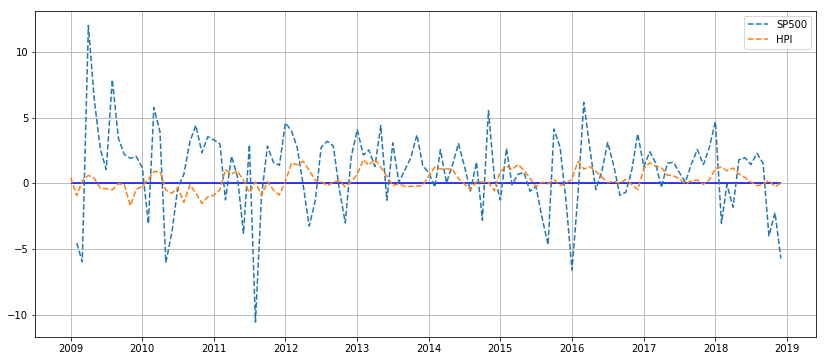

In [12]:
fig, ax = plt.subplots(figsize=(14,6))

# plt.xkcd()
plt.grid(which="both")

#Put a horizontal line on the zero line
plt.hlines(0, x_axis[0], x_axis[len(x_axis)-1], colors='b', linestyles="-")

# plt.plot_date(x_axis, DJIA_y,linewidth=1.5, linestyle="-.", marker="")

# plt.plot_date(x_axis, NAS_y,linewidth=1.5, linestyle=":", marker="")

ax.plot_date(x_axis, SP500_y,linewidth=1.5, linestyle="--", marker="")

ax.plot_date(x_axis, HPI_y,linewidth=1.5, linestyle="--", marker="")

ax.legend()


In [13]:
#Creating a generalized plot function for stockmaret vs HPI plotting
def plotter(x, y, region_name):
    #Making the plot/figure canvas object
    fig, ax = plt.subplots(figsize=(14,6))

    #plot the points
    ax.plot(x, y, linewidth=0, marker="o")

    # getting the line. BE SURE TO REMOVE NANs in the DF by changing .tail(X)
    # -X means remove X amount of rows from the top
    (slope, intercept, _, _, _) = linregress(x.tail(-1), y.tail(-1))


    plotline(slope, intercept)

    plt.title(region_name + " Housing Price Index vs Stock Market (% Change)")
    plt.xlabel("Stock Market % Change")
    
    plt.savefig("Pictures/" + region_name)
    


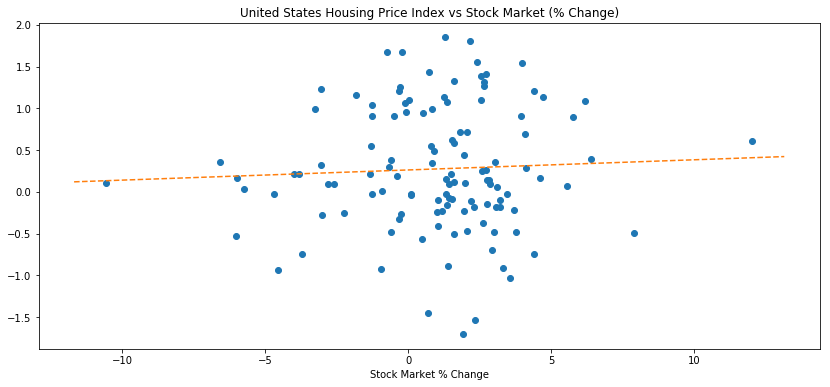

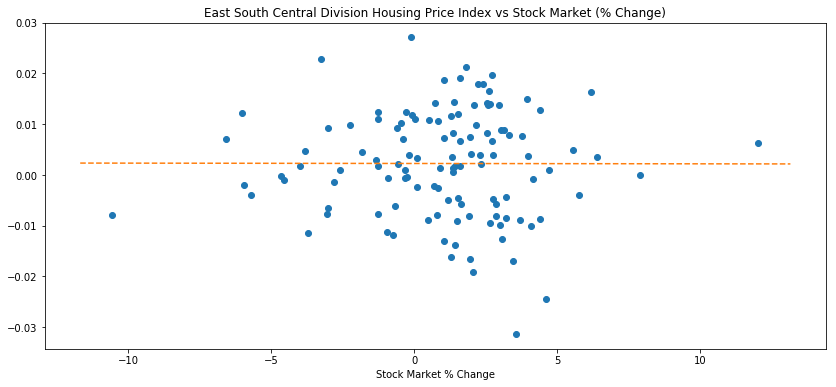

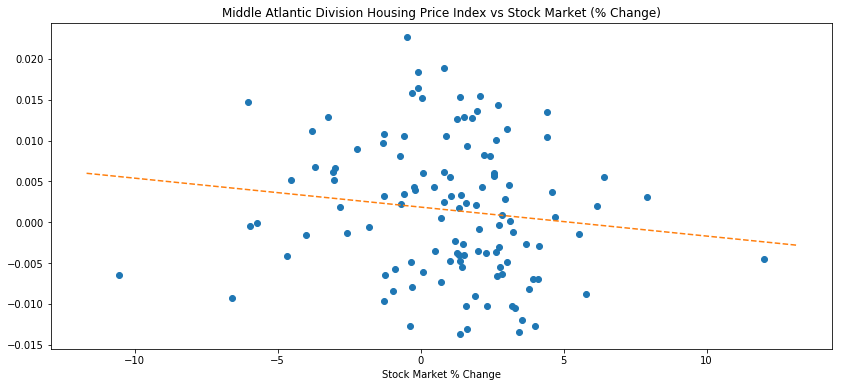

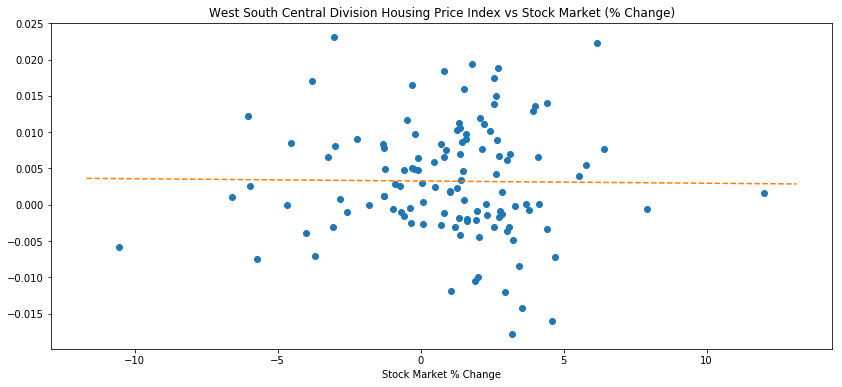

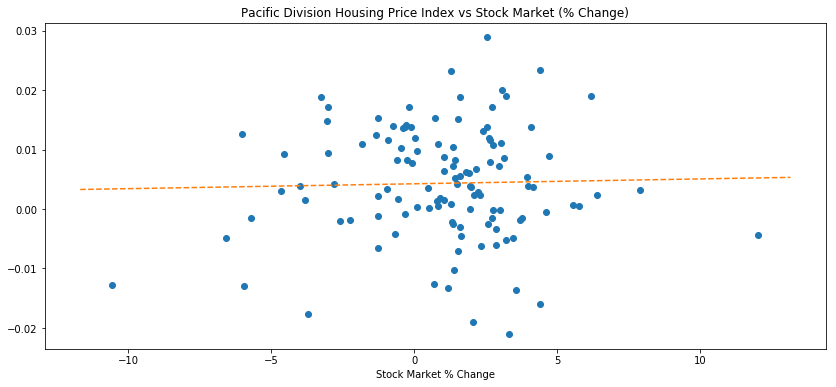

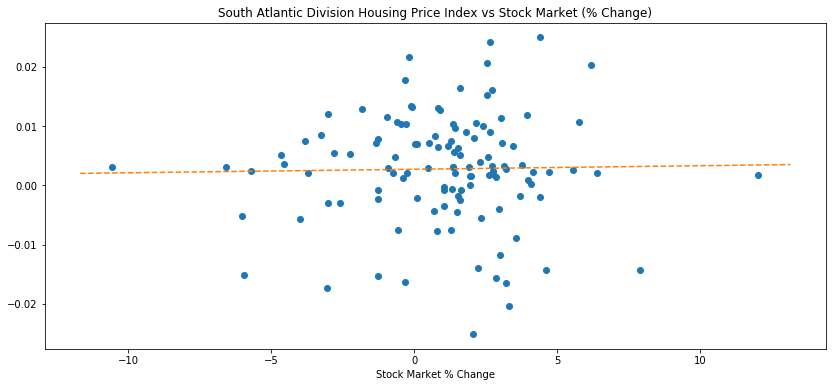

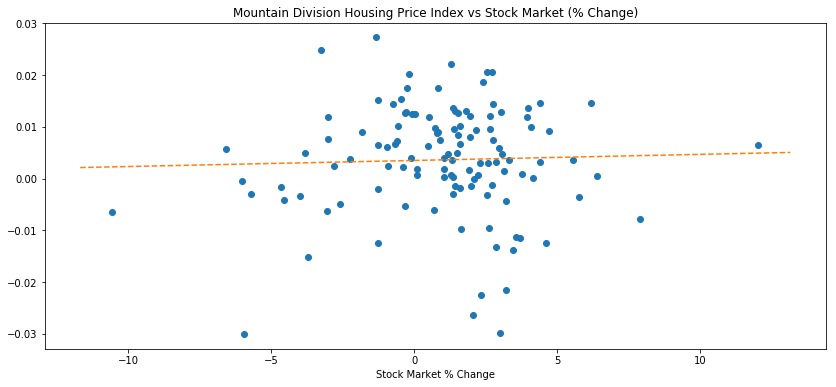

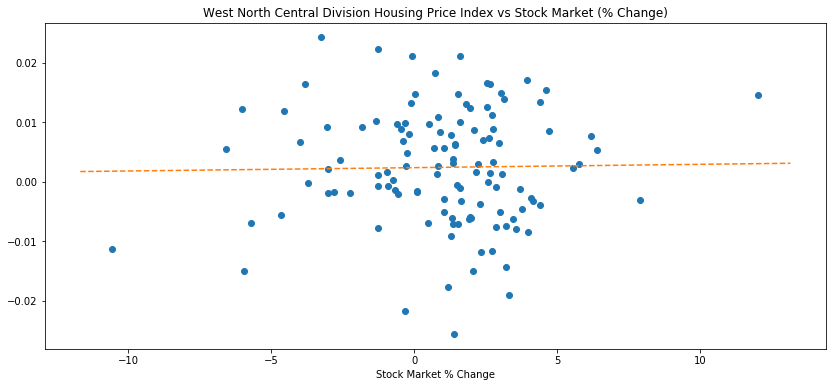

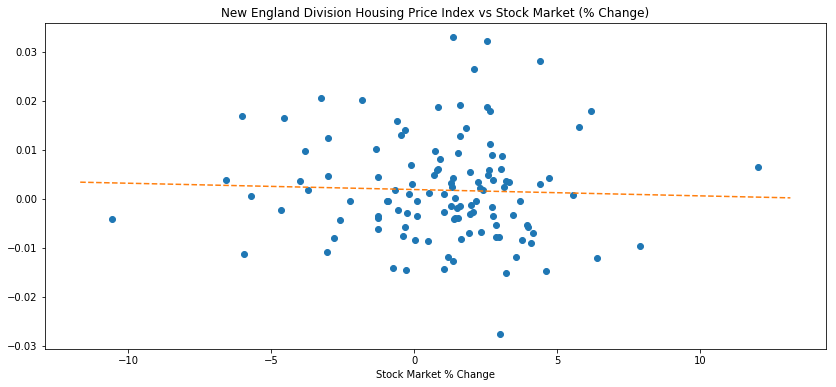

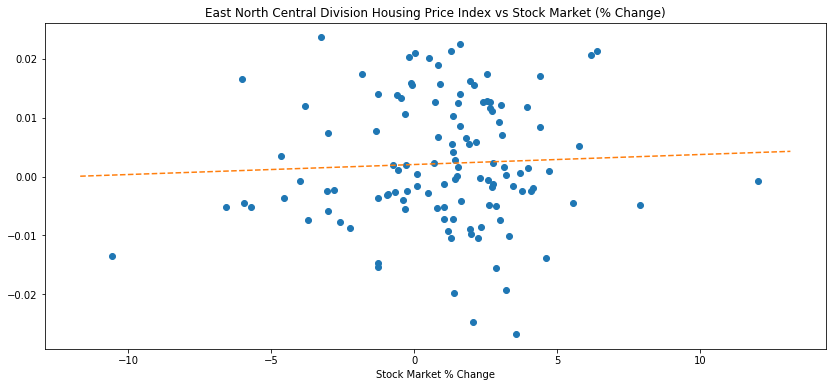

In [14]:
#making a stock vs HPI plot for all HPIs
for i in range(len(HPI_dfs)):
    HPI_df = HPI_dfs[i]
    #Cleaning the HPI df further
    HPI_df = HPI_df.rename(columns={"yr":"year", "period":"month", "Pct_change":"VALUE"})
    
    #Remove extra months
    HPI_df = HPI_df[HPI_df.year >= 2009]
    HPI_df = HPI_df[HPI_df.year <= 2018]

    #Converting to add a date-time object
    HPI_df["day"] = 1
    HPI_df["Date"] = pd.to_datetime(HPI_df[["year", "month", "day"]])
    HPI_y = HPI_df["VALUE"]
    HPI_y = HPI_y.rename("HPI")
    
    #Get the name of the region
    region_name = HPI_df.iloc[0,2]
    
    #This x_axis should work for all plots now.
    x_axis = HPI_df["Date"]
    
    plotter(SP500_y, HPI_y, region_name)
    


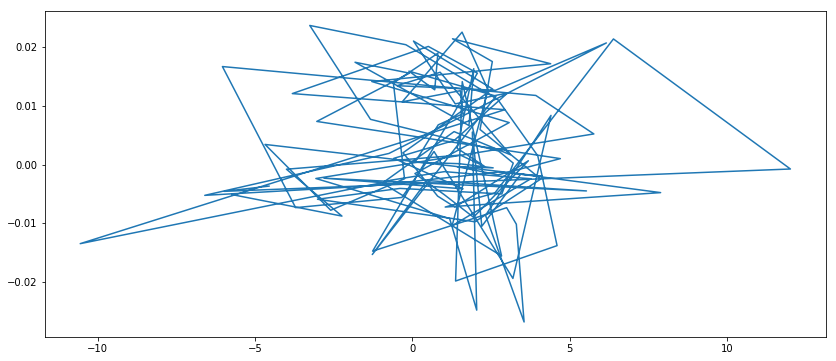

In [15]:
# plt.xkcd(scale=100, length=1000, randomness=4)
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(SP500_y, HPI_y)

plt.savefig("Pictures/Basic Summary")

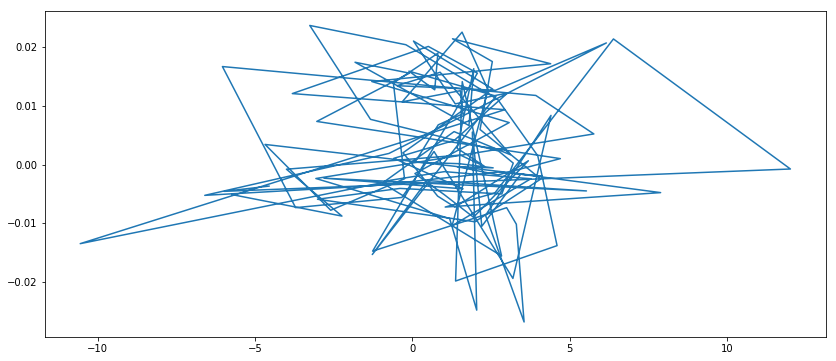

In [16]:
# plt.xkcd(scale=100, length=100, randomness=4)
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(SP500_y, HPI_y)

plt.savefig("Pictures/Basic Summary 2")